<a href="https://colab.research.google.com/github/dowonshun/Khanacademy/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(len(y_train))
print(len(y_test))
print(x_train.shape)
print(x_test.shape)

60000
10000
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(y_train)
print(y_test)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


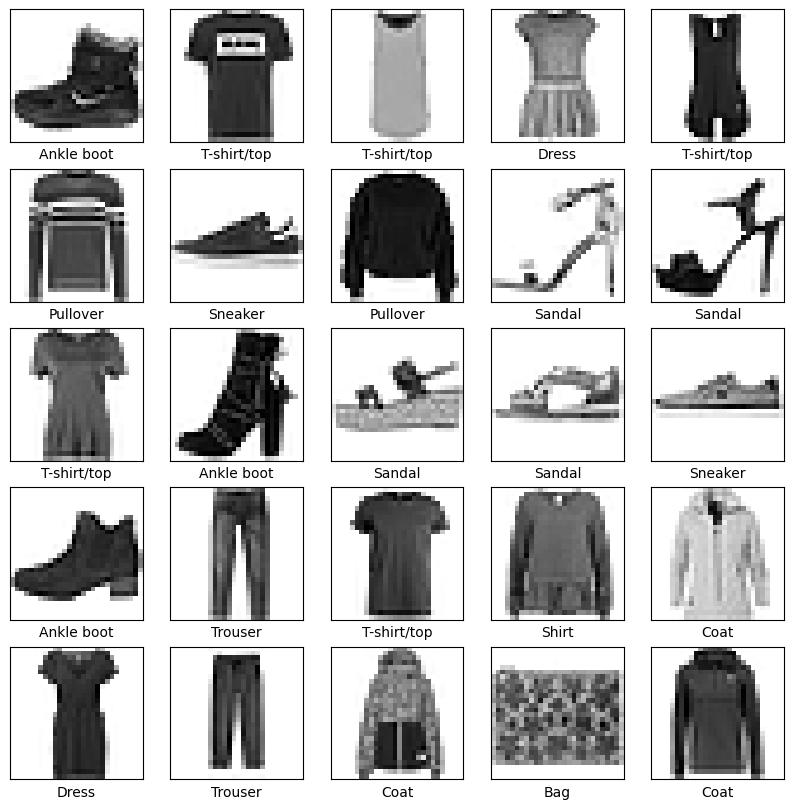

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) #5행5열
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

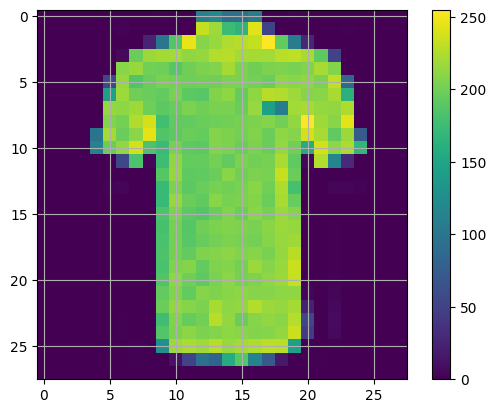

In [ ]:
plt.figure()
plt.imshow(x_train[1200])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
x_train = x_train / 255.0

x_test = x_test / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
hist = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9119 - loss: 0.2349 - val_accuracy: 0.8822 - val_loss: 0.3386
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9120 - loss: 0.2304 - val_accuracy: 0.8849 - val_loss: 0.3375
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9154 - loss: 0.2226 - val_accuracy: 0.8842 - val_loss: 0.3398
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9180 - loss: 0.2148 - val_accuracy: 0.8887 - val_loss: 0.3174
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9220 - loss: 0.2131 - val_accuracy: 0.8906 - val_loss: 0.3312
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9255 - loss: 0.2012 - val_accuracy: 0.8851 - val_loss: 0.3457
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9266 - loss: 0.1985 - val_accuracy: 0.8854 - val_loss: 0.3487
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9262 - loss: 0.1957 -

In [ ]:
train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTrain loss:', train_loss)
print('\nTrain accuracy:', train_acc)

1875/1875 - 4s - 2ms/step - accuracy: 0.9261 - loss: 0.2064

Train accuracy: 0.9261333346366882


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8836 - loss: 0.3717

Test accuracy: 0.8835999965667725


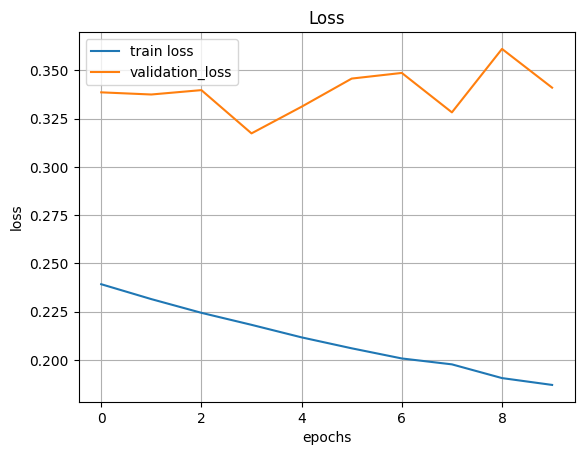

In [ ]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation_loss')
plt.legend(loc='best')
plt.show()

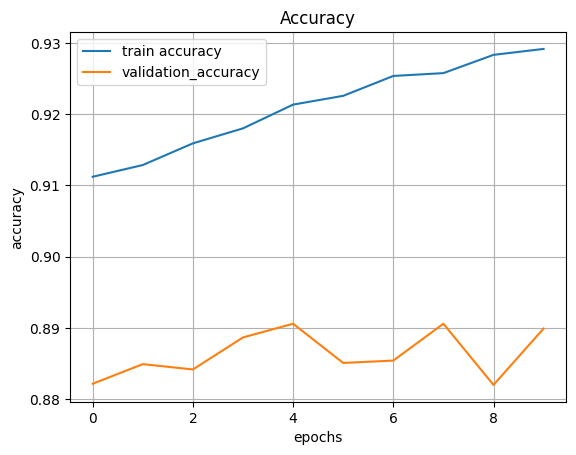

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation_accuracy')

plt.legend(loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


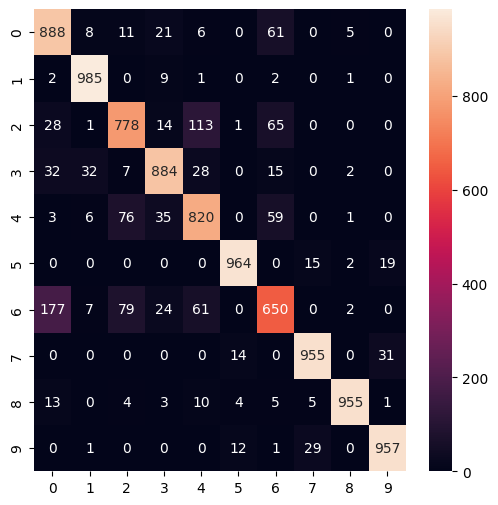

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(6,6))
predicted_value = model.predict(x_test)
cm=confusion_matrix(y_test,#test data의 답은 5, 7 등 십진수
                    np.argmax(predicted_value,axis=-1))
                    #예측값 softmax에 의해 10개로 출력

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
#set the prediction argument
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
predictions[10]

array([2.8170701e-04, 3.1237837e-06, 7.3367238e-02, 1.6537820e-09,
       9.0300477e-01, 9.4664797e-12, 2.3307383e-02, 1.3346909e-09,
       2.5371174e-08, 3.5788089e-05], dtype=float32)

In [ ]:
np.argmax(predictions[10])

np.int64(4)

In [ ]:
y_test[10]

np.uint8(4)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

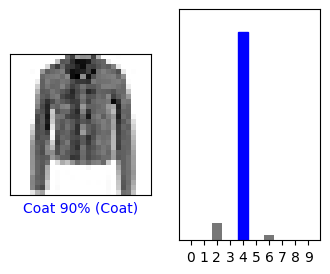

In [ ]:
i = 10
plt.figure(figsize=(4,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

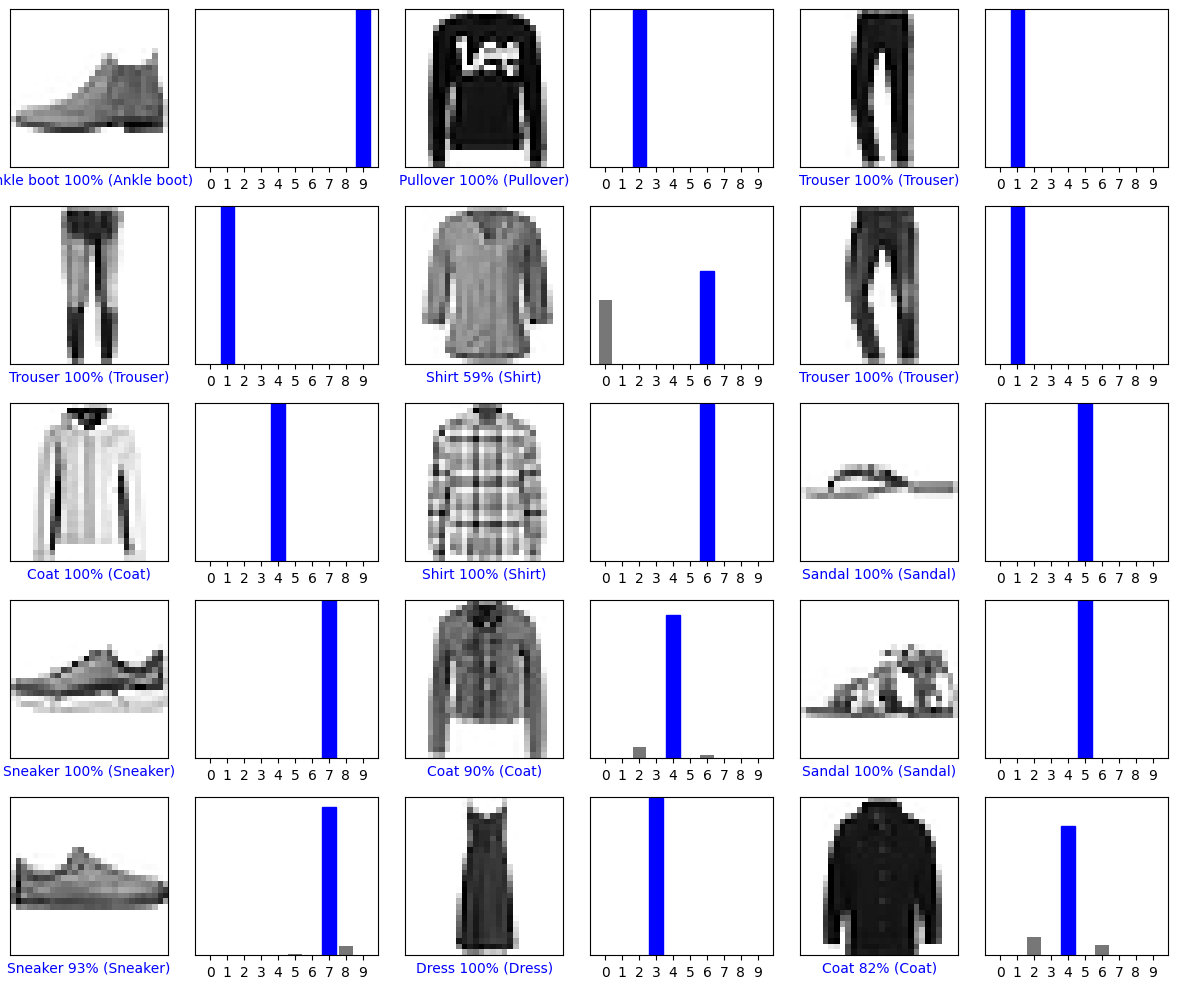

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = x_test[10]

print(img.shape)

(28, 28)


In [ ]:
#make the prediction
img=img.reshape(1,28,28)

predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[2.8170829e-04 3.1237923e-06 7.3367231e-02 1.6537912e-09 9.0300465e-01
  9.4664597e-12 2.3307443e-02 1.3346907e-09 2.5371170e-08 3.5788078e-05]]


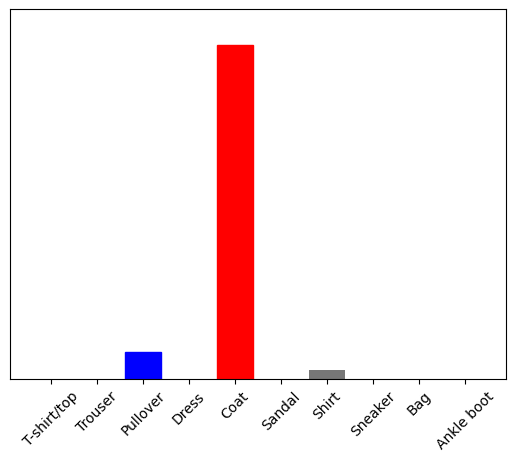

In [ ]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

np.int64(4)